# Loading software

In [1]:
from fretbursts import *
sns = init_notebook()
import lmfit
import phconvert
import os
from fretbursts.burstlib_ext import burst_search_and_gate

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.6.5).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


# Name and Load in data

first name the data file and check it exists, it will look for the file starting from inside the "Anaconda Projects Folder"

In [3]:
file1 = "definitiveset/1a1.hdf5"
file2 = "definitiveset/1a2.hdf5"
file3 = "definitiveset/1b1.hdf5"
file4 = "definitiveset/1b2.hdf5"
file5 = "definitiveset/1c1.hdf5"
file6 = "definitiveset/1c2.hdf5"

files = ["definitiveset/1a1.hdf5", "definitiveset/1a2.hdf5", "definitiveset/1b1.hdf5", "definitiveset/1b2.hdf5", "definitiveset/1c1.hdf5", "definitiveset/1c2.hdf5"]

Load in the file and set correction coefficients

You may get warnings that some parameters are not defined in the file, this is fine as they will be defined in this workbook anyway

In [7]:
alpha = 0.081
delta = 0.076
datasets = []
for file in files:
    datasets.append(loader.photon_hdf5(file))
for dataset in datasets:
    dataset.leakage = alpha
    dataset.dir_ex = delta

WARNING fretbursts.loader
    No offset found, assuming offset = 0.
WARNING fretbursts.loader

        The current file lacks the alternation period defintion.
        You will need to manually add this info using:

          d.add(D_ON=D_ON, A_ON=A_ON)

        where `d` is a Data object and D_ON/A_ON is a tuple with start/stop
        values defining the D/A excitation excitation period. Values are in
        raw timestamps units.
        
WARNING fretbursts.loader
    No offset found, assuming offset = 0.
WARNING fretbursts.loader

        The current file lacks the alternation period defintion.
        You will need to manually add this info using:

          d.add(D_ON=D_ON, A_ON=A_ON)

        where `d` is a Data object and D_ON/A_ON is a tuple with start/stop
        values defining the D/A excitation excitation period. Values are in
        raw timestamps units.
        
WARNING fretbursts.loader
    No offset found, assuming offset = 0.
WARNING fretbursts.loader

        The c

In [8]:
datasets

[definitiveset_1a1 G1.000 Lk8.100 dir7.6,
 definitiveset_1a2 G1.000 Lk8.100 dir7.6,
 definitiveset_1b1 G1.000 Lk8.100 dir7.6,
 definitiveset_1b2 G1.000 Lk8.100 dir7.6,
 definitiveset_1c1 G1.000 Lk8.100 dir7.6,
 definitiveset_1c2 G1.000 Lk8.100 dir7.6]

# Apply alternation cycle

In [9]:
for dataset in datasets:
    dataset.add(det_donor_accept = (0, 1),
    alex_period = 10000,
    offset = 0,
    D_ON = (0, 4500),
    A_ON = (5000, 9500))
    loader.alex_apply_period(dataset)

# Total photons (after ALEX selection):     2,003,013
#  D  photons in D+A excitation periods:    1,141,024
#  A  photons in D+A excitation periods:      861,989
# D+A photons in  D  excitation period:     1,471,746
# D+A photons in  A  excitation period:       531,267

# Total photons (after ALEX selection):     2,067,432
#  D  photons in D+A excitation periods:    1,161,138
#  A  photons in D+A excitation periods:      906,294
# D+A photons in  D  excitation period:     1,501,952
# D+A photons in  A  excitation period:       565,480

# Total photons (after ALEX selection):     3,266,191
#  D  photons in D+A excitation periods:    2,027,118
#  A  photons in D+A excitation periods:    1,239,073
# D+A photons in  D  excitation period:     2,530,526
# D+A photons in  A  excitation period:       735,665

# Total photons (after ALEX selection):     3,189,530
#  D  photons in D+A excitation periods:    1,997,792
#  A  photons in D+A excitation periods:    1,191,738
# D+A photons in  D  exci

# Background Estimation

Background estimation works by plotting log of photons by the delay between them, assuming a poisson distribution of photon arrivals and fitting a line. The plot will contain single molecule bursts however, so a threshold (in microseconds) has to be defined where the fit begins. There are better ways of finding the threshold (TBD) but this will work for now

 - Calculating BG rates ... [DONE]
 - Calculating BG rates ... [DONE]
 - Calculating BG rates ... [DONE]
 - Calculating BG rates ... [DONE]
 - Calculating BG rates ... [DONE]
 - Calculating BG rates ... [DONE]


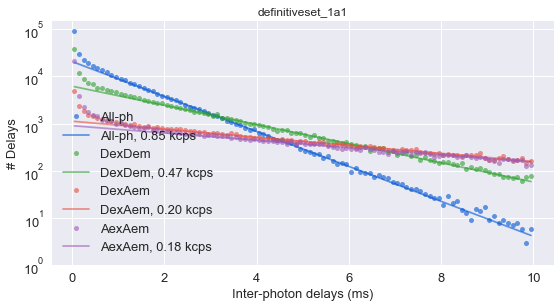

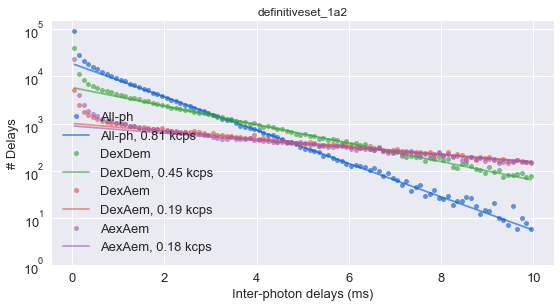

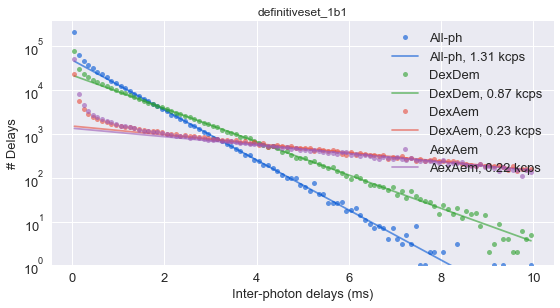

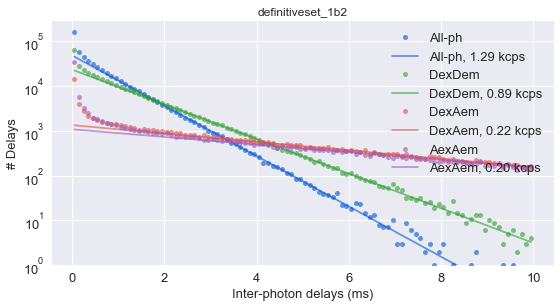

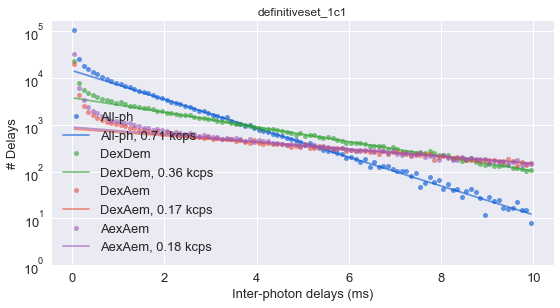

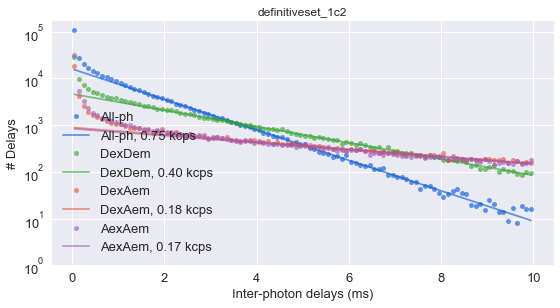

In [11]:
threshold = 1500
recalctime = 300
for dataset in datasets:
    dataset.calc_bg(bg.exp_fit, time_s = recalctime, tail_min_us=(threshold))
    dplot(dataset, hist_bg, show_fit=True)

# Gamma and Beta Correction

This will derive gamma and beta using the data sets you have supplied

It works by fitting the equation

S = 1/(1+bg+(1-g)*b*E)

To do this we will need to apply the correction factors found so far, and to we'll also use a dual channel burst search instead of an all photon burst search.

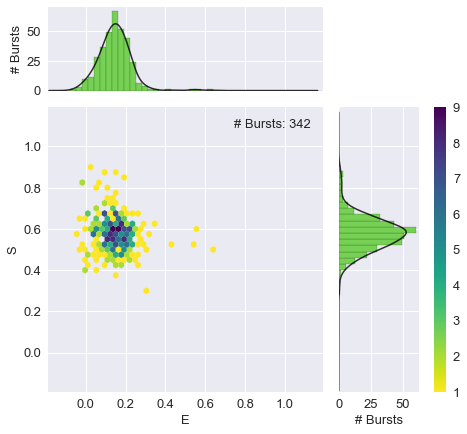

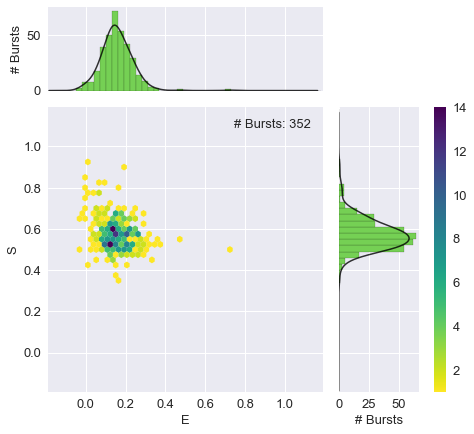

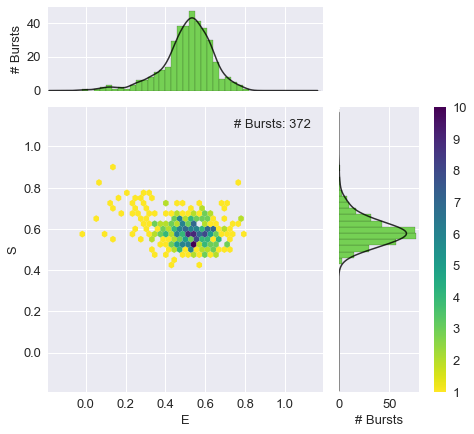

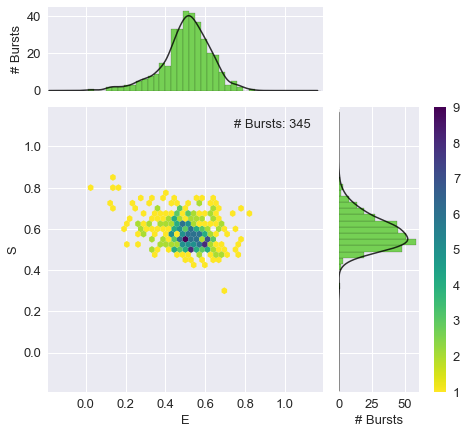

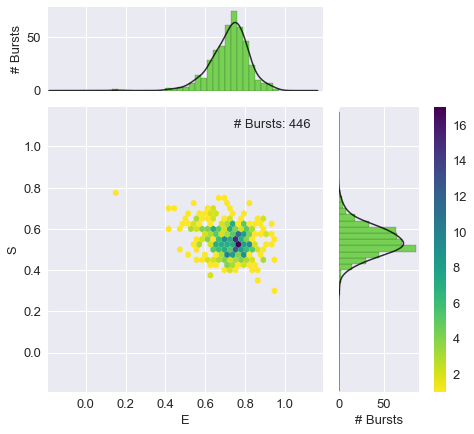

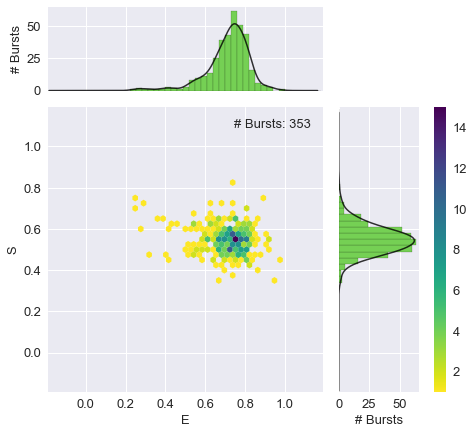

In [50]:
colourscheme= "viridis_r"
burstsets = []
for dataset in datasets:
    dataset = burst_search_and_gate(dataset, F=45, m=10, mute=True)
    dataset = dataset.select_bursts(select_bursts.size, th1=50)
    burstsets.append(dataset)
for burstset in burstsets:
    alex_jointplot(burstset, cmap=colourscheme, marginal_color=20, vmax_fret=False)

In [19]:
x=50
colourscheme = "viridis_r"
d1=burst_search_and_gate(d1, F=(45, 45), m=10, mute=True)
d1 = d1.select_bursts(select_bursts.size, add_naa=True, th1=10)
d1 = d1.select_bursts(select_bursts.size, th1=x,)
d1 = d1.select_bursts(select_bursts.naa, th1=0,)
roi= dict(E1=-0.2, E2=1.2, S1=0.0, S2=1.0, rect=True)
d1 = d1.select_bursts(select_bursts.ES, **roi)
g1 = alex_jointplot(d1, cmap=colourscheme, marginal_color=20, vmax_fret=False)
bpl.plot_ES_selection(g1.ax_joint, **roi);
d2=burst_search_and_gate(d2, F=(45, 45), m=10, mute=True)
d2 = d2.select_bursts(select_bursts.size, add_naa=True, th1=10)
d2 = d2.select_bursts(select_bursts.size, th1=x,)
d2 = d2.select_bursts(select_bursts.naa, th1=20,)
d2 = d2.select_bursts(select_bursts.ES, **roi)
g2 = alex_jointplot(d2, cmap=colourscheme, marginal_color=20, vmax_fret=False)
bpl.plot_ES_selection(g2.ax_joint, **roi);
d3=burst_search_and_gate(d3, F=(45, 45), m=10, mute=True)
d3 = d3.select_bursts(select_bursts.size, add_naa=True, th1=10)
d3 = d3.select_bursts(select_bursts.size, th1=x,)
d3 = d3.select_bursts(select_bursts.naa, th1=20,)
d3 = d3.select_bursts(select_bursts.ES, **roi)
g3 = alex_jointplot(d3, cmap=colourscheme, marginal_color=20, vmax_fret=False)
bpl.plot_ES_selection(g3.ax_joint, **roi);
d4=burst_search_and_gate(d4, F=(45, 45), m=10, mute=True)
d4 = d4.select_bursts(select_bursts.size, add_naa=True, th1=10)
d4 = d4.select_bursts(select_bursts.size, th1=x,)
d4 = d4.select_bursts(select_bursts.naa, th1=20,)
d4 = d4.select_bursts(select_bursts.ES, **roi)
g4 = alex_jointplot(d4, cmap=colourscheme, marginal_color=20, vmax_fret=False)
bpl.plot_ES_selection(g4.ax_joint, **roi);
d5=burst_search_and_gate(d5, F=(45, 45), m=10, mute=True)
d5 = d5.select_bursts(select_bursts.size, add_naa=True, th1=10)
d5 = d5.select_bursts(select_bursts.size, th1=x,)
d5 = d5.select_bursts(select_bursts.naa, th1=20,)
d5 = d5.select_bursts(select_bursts.ES, **roi)
g5 = alex_jointplot(d5, cmap=colourscheme, marginal_color=20, vmax_fret=False)
bpl.plot_ES_selection(g5.ax_joint, **roi);
d6=burst_search_and_gate(d6, F=(45, 45), m=10, mute=True)
d6 = d6.select_bursts(select_bursts.size, add_naa=True, th1=10)
d6 = d6.select_bursts(select_bursts.size, th1=x,)
d6 = d6.select_bursts(select_bursts.naa, th1=20,)
d6 = d6.select_bursts(select_bursts.ES, **roi)
g6 = alex_jointplot(d6, cmap=colourscheme, marginal_color=20, vmax_fret=False)
bpl.plot_ES_selection(g6.ax_joint, **roi);

NameError: name 'd1' is not defined

In [47]:
datasets[5]

definitiveset_1c2 G1.000 BGexp-300s Lk8.100 dir7.6

In [52]:

def ESgauss(dataset):
    dataset.E_fitter.fit_histogram(model=mfit.factory_gaussian(), verbose=False, pdf=False)
    params = dataset.E_fitter.params
    Efit = params.to_dict()
    E = Efit['center'][0]
    dataset.S_fitter.fit_histogram(model=mfit.factory_gaussian(), verbose=False, pdf=False)
    params = dataset.S_fitter.params
    Sfit = params.to_dict()
    S = Sfit['center'][0]
    return(E, S)
x = []
y = []
for dataset in burstsets:
    E, S = ESgauss(dataset)
    x.append(E)
    y.append(S)    


[[Model]]
    Model(_eval, nan_policy='omit')
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 6
    # variables        = 2
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -48.879
    Bayesian info crit = -49.296
[[Variables]]
    b:   0.84807486 +/- 0.046922 (5.53%) (init= 0.5)
    g:   0.85632321 +/- 0.085343 (9.97%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(b, g)                      = -0.894 



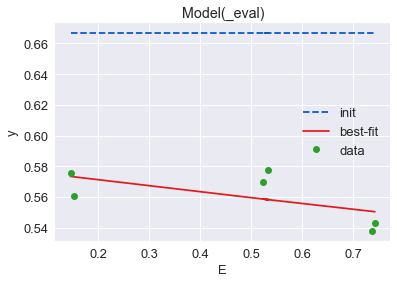

In [56]:
E=x
model = lmfit.models.ExpressionModel('1 / ( 1 + b * g + ( 1 - g ) * b * E )',
                             independent_vars=["E"], nan_policy = "omit")
params = model.make_params(b=0.5, g=1.0)
fit = model.fit(y, params, E=E)
fit.plot_fit(0)
print(fit.fit_report())

In [55]:
beta = m + c - 1
gamma = (c - 1)/(beta)
print("beta = ", beta)
print("gamma = ", gamma)

beta =  0.852377746076942
gamma =  0.8494453486930101


In [57]:
pars = fit.params
beta = pars['b']
beta=beta.value
gamma = pars['g']
gamma=gamma.value
print("gamma = ", gamma)

gamma =  0.8563232142630293
